# 히브리어 데이터를 이용한 통계적 언어 분석의 예

본 노트에서는 구문 정보가 포함되어 있는 성서 데이터 베이스(Text-Fabric)와 다양한 통계 수치를 산출할 수 있는 통계 프로그램인 R을 이용하여 간단하게 성서 히브리어 데이터를 활용한 간단한 통계 분석을 해 보도록 하겠습니다. 히브리어 통계 분석을 위해서는 언어 데이터를 먼저 준비해야 합니다. (*본 내용은 테스트를 위한 예시입니다)

In [1]:
library(ggplot2)
library(grid)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




본 노트에서 통계적 언어 분석을 위한 절차는 대략 아래와 같습니다.

* 샘플 텍스트 선정: 샘플 텍스트는 텍스트의 시대 구분에 있어서 학자들의 이견이 거의 없는 것으로 선정을 해야 합니다. 여기에서는 상대적으로 이른 시기의 본문으로 사무엘서/열왕기서를 택하였고, 포로기 이후의 본문으로 역대기서를 택하였습니다.
* 시험 텍스트 선정: 샘플 텍스트 분석을 통해 어느 정도 특징을 구별해 낼 수 있으면 이 데이터를 토대로 시대를 추측할 대상인 텍스트를 선정해야 합니다. 여기에서는 레위기와 에스더를 선정했습니다. 이 책들이 사무엘서/열왕기서 혹은 역대기서에 가까운지 혹은 과도기적인 특징을 보이는 지를 살펴볼 것입니다.
* 분류 기준 선정: 어느 특징에 따라 텍스트를 분류할 것인지를 결정해야 합니다. 정확한 분석을 위해서는 다양한 언어적인 특징들을 적용해야겠지만, 저는 프랑크 폴락(Frank Polak)이 제시한 기준 가운데 명사절 비율[1]과 아비 후르비츠(Avi Hurvitz)가 제시한 여러 기준 가운데 אל과 על 전치사 사용 비율[2] 등을 기준으로 텍스트의 특징을 파악해 볼 것입니다.


-------

[1] 명사절 비율이 높을수록 구어체보다는 문어체에 가까우며 이는 포로 후기 페르시아 서기관 문화의 영향을 반영하는 것이다.

[2] 포로 후기 문헌으로 갈수록 아람어의 영향으로 אל 보다는 על을 선호하는 경향이 강하다.

In [2]:
# 역대기서
chr1 <- read.csv("1_Chronicles.csv", header = TRUE)
chr2 <- read.csv("2_Chronicles.csv", header = TRUE)
chr <- rbind(chr1, chr2)

#사무엘서+열왕기서 (편의상 영어 약어는 sam으로 표기함)
sam1 <- read.csv("1_Samuel.csv", header = TRUE)
sam2 <- read.csv("2_Samuel.csv", header = TRUE)
sam3 <- read.csv("1_Kings.csv", header = TRUE)
sam4 <- read.csv("2_Kings.csv", header = TRUE)
sam <- rbind(sam1, sam2, sam3, sam4)

#레위기
lev <- read.csv("Leviticus.csv", header = TRUE)

#에스더
esth <- read.csv("Esther.csv", header = TRUE)

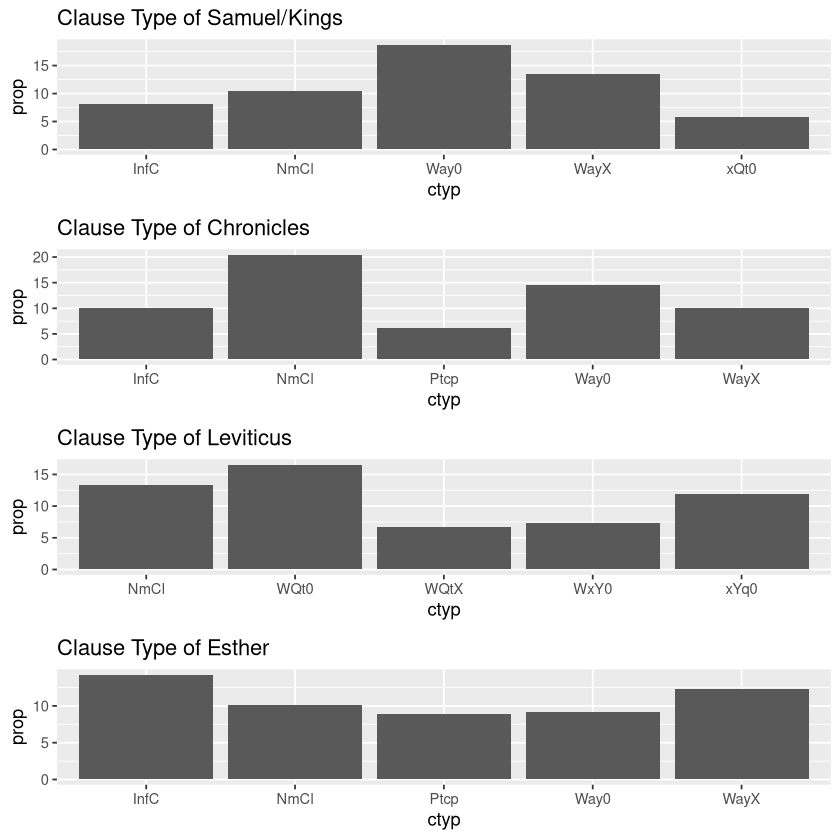

In [3]:
#clause type
sam_ctyp = as.data.frame(table(sam$ctyp, exclude=""))
sam_ctyp <- cbind(sam_ctyp, prop.table(sam_ctyp$Freq)*100)
names(sam_ctyp) <- c("ctyp", "freq", "prop")
#sam_ctyp <- sam_ctyp[!(sam_ctyp$sam < 200),]
sam_ctyp <- sam_ctyp[order(sam_ctyp$freq,decreasing=T)[1:5],]
sam_ctyp <- arrange(sam_ctyp, desc(freq))

chr_ctyp = as.data.frame(table(chr$ctyp, exclude=""))
chr_ctyp <- cbind(chr_ctyp, prop.table(chr_ctyp$Freq)*100)
names(chr_ctyp) <- c("ctyp", "freq", "prop")
#chr_ctyp <- chr_ctyp[!(chr_ctyp$chr < 200),]
chr_ctyp <- chr_ctyp[order(chr_ctyp$freq,decreasing=T)[1:5],]
chr_ctyp <- arrange(chr_ctyp, desc(freq))

lev_ctyp = as.data.frame(table(lev$ctyp, exclude=""))
lev_ctyp <- cbind(lev_ctyp, prop.table(lev_ctyp$Freq)*100)
names(lev_ctyp) <- c("ctyp", "freq", "prop")
#lev_ctyp <- lev_ctyp[!(lev_ctyp$lev < 200),]
lev_ctyp <- lev_ctyp[order(lev_ctyp$freq,decreasing=T)[1:5],]
lev_ctyp <- arrange(lev_ctyp, desc(freq))

esth_ctyp = as.data.frame(table(esth$ctyp, exclude=""))
esth_ctyp <- cbind(esth_ctyp, prop.table(esth_ctyp$Freq)*100)
names(esth_ctyp) <- c("ctyp", "freq", "prop")
esth_ctyp <- esth_ctyp[order(esth_ctyp$freq,decreasing=T)[1:5],]
esth_ctyp <- arrange(esth_ctyp, desc(freq))

ctyp1 <- ggplot(data=sam_ctyp, aes(x=ctyp, y=prop)) + 
#  geom_bar(stat="identity", width=1) +
  geom_bar(stat="identity") +
  ggtitle("Clause Type of Samuel/Kings")

ctyp2 <- ggplot(data=chr_ctyp, aes(x=ctyp, y=prop)) + 
#  geom_bar(stat="identity", width=1) +
  geom_bar(stat="identity") +
  ggtitle("Clause Type of Chronicles")

ctyp3 <- ggplot(data=lev_ctyp, aes(x=ctyp, y=prop)) + 
  #  geom_bar(stat="identity", width=1) +
  geom_bar(stat="identity") +
  ggtitle("Clause Type of Leviticus")

ctyp4 <- ggplot(data=esth_ctyp, aes(x=ctyp, y=prop)) + 
  geom_bar(stat="identity") +
  ggtitle("Clause Type of Esther")


grid.newpage()
grid.draw(rbind(ggplotGrob(ctyp1), ggplotGrob(ctyp2), ggplotGrob(ctyp3), ggplotGrob(ctyp4), size = "last"))


위 그래프는 책 별로 가장 많이 사용된 상위 5개의 절 유형을 분석하고 있는 그래프입니다. 각 지표는 아래와 같습니다.

* InfC: 구문형 부정사 절
* NmCl: 명사절
* Ptcp: 분사절
* Way0, WayX, WQtX: 봐브+동사로 이루어진 다양한 유형의 동사절

위 유형들 가운데 동사절을 제외한 구문형 부정사 절, 명사절, 분사절 등은 모두 명사적인 요소로 이루어진 절이라고 볼 수 있습니다. 위의 지표를 살펴보면 역대기에서 명사절의 비율이 상당히 높게 나타나는 것을 발견할 수 있습니다. 반면 사무엘서는 동사절의 비율이 매우 높습니다. 즉 후기의 책일수록 명사절의 비율이 높다는 폴락의 이론을 어느 정도 뒷받침해주는 지표라고 볼 수 있습니다.

그리고 레위기와 에스더서의 경우를 보면 레위기는 명사절보다는 동사절의 비율이 크게 나타나는 것을 볼 수 있습니다. 명사절의 비율만 놓고 본다면 레위기는 포로 후기의 문체를 보이고 있지는 않은 것 같습니다. 반면 에스더서는 명사절 비율이 높게 나타나는데 이는 에스더서가 포로 후기의 문체를 전형적으로 나타내 보이고 있는 것 같습니다. 좀 더 그 차이를 확실히 하기 위해 각 책의 명사절 요소들의 비율을 모두 합산하여 점 그래프로 아래와 같이 만들어 보았습니다.

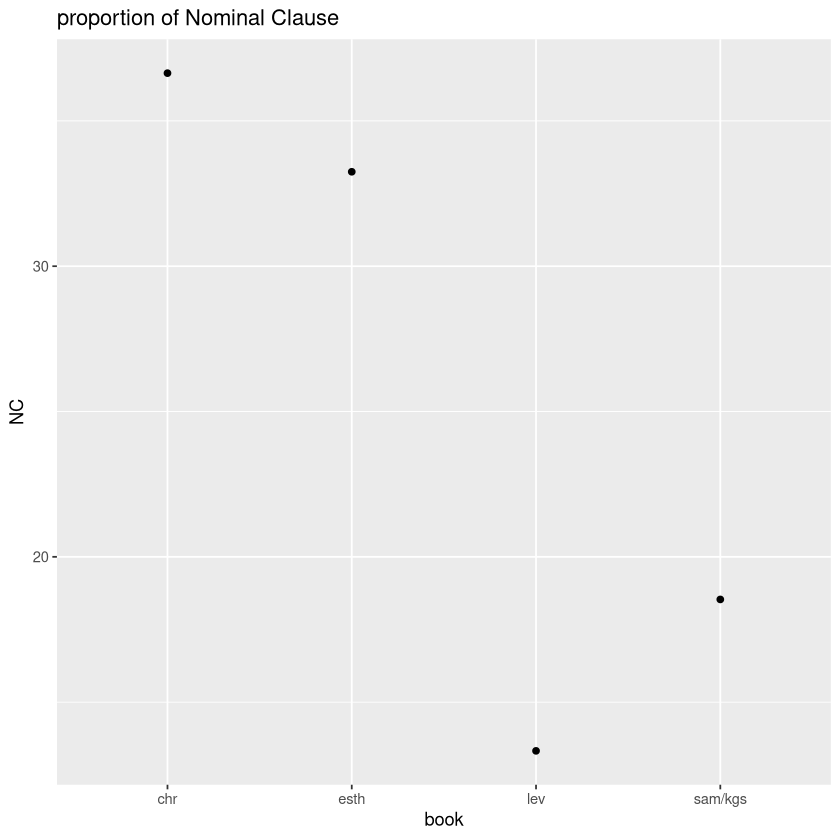

In [8]:
#proportion of nominal clause of each book
sam_NmCl <- sam_ctyp[(sam_ctyp$ctyp == 'NmCl' | sam_ctyp$ctyp == 'Ptcp' | sam_ctyp$ctyp == 'InfC' | sam_ctyp$ctyp == 'Voct' | sam_ctyp$ctyp == 'AjCl'),]
sum_sam = sum(sam_NmCl[, c(3)])

chr_NmCl <- chr_ctyp[(chr_ctyp$ctyp == 'NmCl' | chr_ctyp$ctyp == 'Ptcp' | chr_ctyp$ctyp == 'InfC' | chr_ctyp$ctyp == 'Voct' | chr_ctyp$ctyp == 'AjCl'),]
sum_chr = sum(chr_NmCl[, c(3)])

lev_NmCl <- lev_ctyp[(lev_ctyp$ctyp == 'NmCl' | lev_ctyp$ctyp == 'Ptcp' | lev_ctyp$ctyp == 'InfC' | lev_ctyp$ctyp == 'Voct' | lev_ctyp$ctyp == 'AjCl'),]
sum_lev = sum(lev_NmCl[, c(3)])

esth_NmCl <- esth_ctyp[(esth_ctyp$ctyp == 'NmCl' | esth_ctyp$ctyp == 'Ptcp' | esth_ctyp$ctyp == 'InfC' | esth_ctyp$ctyp == 'Voct' | esth_ctyp$ctyp == 'AjCl'),]
sum_esth = sum(esth_NmCl[, c(3)])

book <- c("sam/kgs", "chr", "lev", "esth")
NC <- c(sum_sam, sum_chr, sum_lev, sum_esth)
NCtable <- data.frame(book, NC)

ggplot(data=NCtable, aes(x=book, y=NC)) + 
  geom_point() +
  ggtitle("proportion of Nominal Clause")

In [9]:
"역대기"
sum_chr

"에스더"
sum_esth

"레위기"
sum_lev

"사무엘서/열왕기서"
sum_sam

[1] "역대기"

[1] 36.64173

[1] "에스더"

[1] 33.24841

[1] "레위기"

[1] 13.32511

[1] "사무엘서/열왕기서"

[1] 18.53511

위에서 유추한대로 역대기서와 에스더서, 그리고 레위기와 사무엘서과 명확하게 구별됨을 볼 수 있습니다. 레위기는 사무엘서보다도 명사문장의 비율이 상당히 낮게 나오는 것을 볼 수 있는데, 이는 주로 제의에 대한 명령(동사)이 주되게 나오는 레위기 책 자체의 문체적인 특징에 기인하는 것이라 볼 수 있습니다.

다음으로 전치사의 사용의 경향성을 살펴 보도록 하겠습니다. 위에서 했던 대로 우선 각 책에서 나타나는 전치사 사용 비율을 아래와 같이 그래프로 표현해 보았습니다.

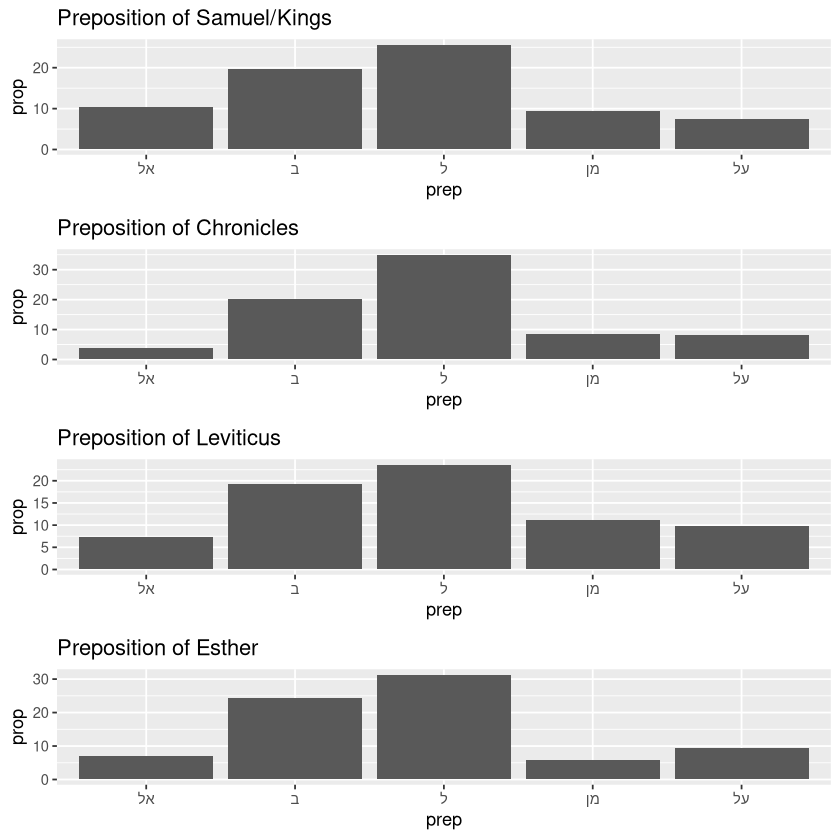

In [11]:
#preposition
sam_prep <- filter(sam, sp == 'prep')
sam_prep <- select(sam_prep, lex)
sam_prep = as.data.frame(table(sam_prep$lex))
sam_prep <- cbind(sam_prep, prop.table(sam_prep$Freq)*100)
names(sam_prep) <- c("prep", "freq", "prop")
sam_prep <- sam_prep[!(sam_prep$prep == 'את'),]
sam_prep <- sam_prep[order(sam_prep$freq,decreasing=T)[1:5],]

chr_prep <- filter(chr, sp == 'prep')
chr_prep <- select(chr_prep, lex)
chr_prep = as.data.frame(table(chr_prep$lex))
chr_prep <- cbind(chr_prep, prop.table(chr_prep$Freq)*100)
names(chr_prep) <- c("prep", "freq", "prop")
chr_prep <- chr_prep[!(chr_prep$prep == 'את'),]
chr_prep <- chr_prep[order(chr_prep$freq,decreasing=T)[1:5],]

lev_prep <- filter(lev, sp == 'prep')
lev_prep <- select(lev_prep, lex)
lev_prep = as.data.frame(table(lev_prep$lex))
lev_prep <- cbind(lev_prep, prop.table(lev_prep$Freq)*100)
names(lev_prep) <- c("prep", "freq", "prop")
lev_prep <- lev_prep[!(lev_prep$prep == 'את'),]
lev_prep <- lev_prep[order(lev_prep$freq,decreasing=T)[1:5],]

esth_prep <- filter(esth, sp == 'prep')
esth_prep <- select(esth_prep, lex)
esth_prep = as.data.frame(table(esth_prep$lex))
esth_prep <- cbind(esth_prep, prop.table(esth_prep$Freq)*100)
names(esth_prep) <- c("prep", "freq", "prop")
esth_prep <- esth_prep[!(esth_prep$prep == 'את'),]
esth_prep <- esth_prep[order(esth_prep$freq,decreasing=T)[1:5],]

prep1 <- ggplot(data=sam_prep, aes(x=prep, y=prop)) + 
  geom_bar(stat="identity") +
  ggtitle("Preposition of Samuel/Kings")

prep2 <- ggplot(data=chr_prep, aes(x=prep, y=prop)) + 
  geom_bar(stat="identity") +
  ggtitle("Preposition of Chronicles")

prep3 <- ggplot(data=lev_prep, aes(x=prep, y=prop)) + 
  geom_bar(stat="identity") +
  ggtitle("Preposition of Leviticus")


prep4 <- ggplot(data=esth_prep, aes(x=prep, y=prop)) + 
  geom_bar(stat="identity") +
  ggtitle("Preposition of Esther")

grid.newpage()
grid.draw(rbind(ggplotGrob(prep1), ggplotGrob(prep2), ggplotGrob(prep3), ggplotGrob(prep4), size = "last"))


한 눈에 봐도 ל 전치사가 가장 많이 사용되고 있는 전치사임을 볼 수 있습니다. 각각 전치사의 사용 비율을 살펴보면 그렇게 의미 있는 데이터는 눈에 띄지 않습니다. 그런데 앞서 제가 언급했듯이 여기서 중요한 것은 אל과 על의 사용 비율입니다. 사무엘서는 אל이 על보다 빈번하게 사용되고 있는 것을 볼 수 있습니다. 그런데 역대기에서는 완전히 반대입니다. על이 אל보다 훨씬 많은 비율로 사용되고 있습니다. 레위기와 에스더에서도 על이 많이는 아니지만 보다 더 많이 사용되고 있는 것 같습니다.

이 데이터를 על의 사용 수 / אל의 사용 수 공식을 이용하여 사용 비율 값을 구한 뒤 아래와 같이 점 그래프로 표현해 보았습니다. 값이 크면 클 수록 על의 사용 비율이 보다 높다는 의미입니다.

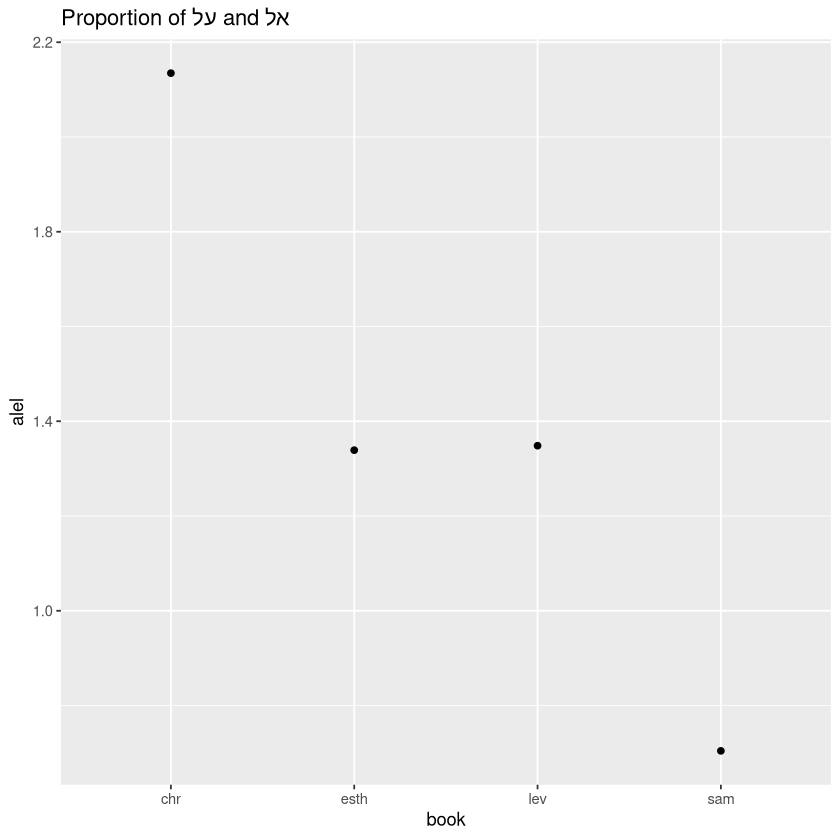

In [12]:
#proportion of על and אל of each book
sam_al = sam_prep[sam_prep$prep == "על",]
sam_al = sam_al$freq
sam_el = sam_prep[sam_prep$prep == "אל",]
sam_el = sam_el$freq
sam_al_el = sam_al / sam_el

chr_al = chr_prep[chr_prep$prep == "על",]
chr_al = chr_al$freq
chr_el = chr_prep[chr_prep$prep == "אל",]
chr_el = chr_el$freq
chr_al_el = chr_al / chr_el

lev_al = lev_prep[lev_prep$prep == "על",]
lev_al = lev_al$freq
lev_el = lev_prep[lev_prep$prep == "אל",]
lev_el = lev_el$freq
lev_al_el = lev_al / lev_el

esth_al = esth_prep[esth_prep$prep == "על",]
esth_al = esth_al$freq
esth_el = esth_prep[esth_prep$prep == "אל",]
esth_el = esth_el$freq
esth_al_el = esth_al / esth_el

book <- c("sam", "chr", "lev", "esth")
alel <- c(sam_al_el, chr_al_el, lev_al_el, esth_al_el)
aleltable <- data.frame(book, alel)

ggplot(data=aleltable, aes(x=book, y=alel)) + 
  geom_point() +
  ggtitle("Proportion of על and אל")

흥미로운 결과가 나왔습니다. 위의 그래프에서 볼 수 있듯이 사무엘서/열왕기서와 역대기의 특징이 명확하게 구분됩니다. 그런데 에스더서와 레위기는 거의 중간 값을 가지고 있는 것을 볼 수 있습니다. 전치사의 특징 만으로 본다면 에스더서와 레위기는 상대적으로 과도기적인 언어 특징을 보이고 있다고 볼 수 있습니다.